üîÑ D√©marrage de l'analyse...
Chargement des donn√©es...

üìä Analyse exploratoire des donn√©es :

Aper√ßu des donn√©es :
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             

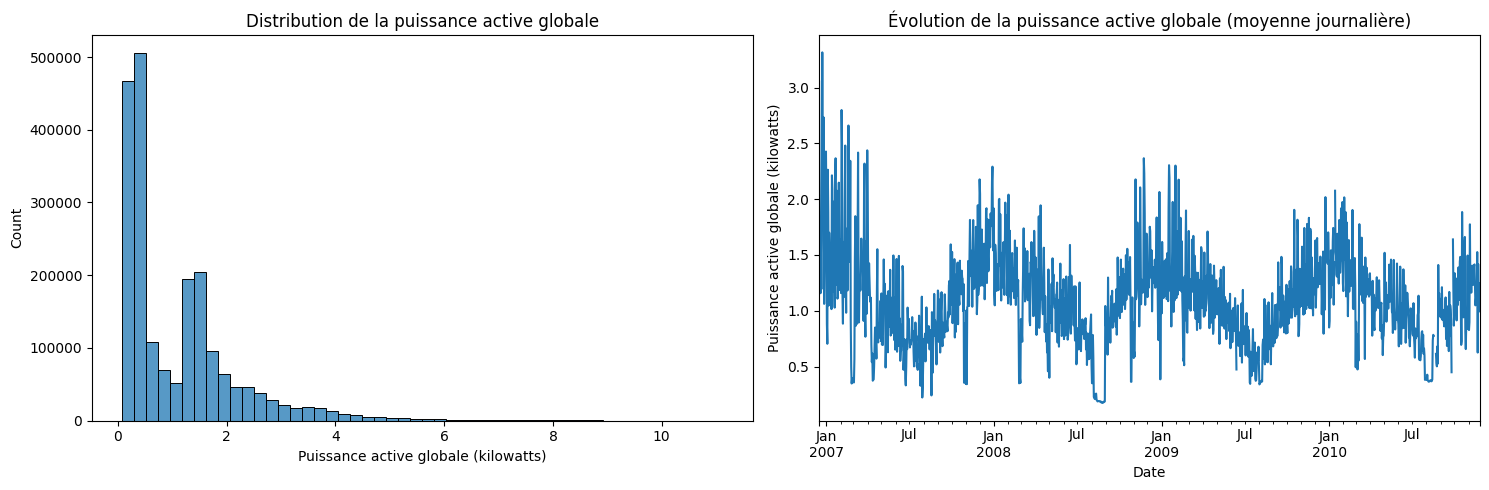

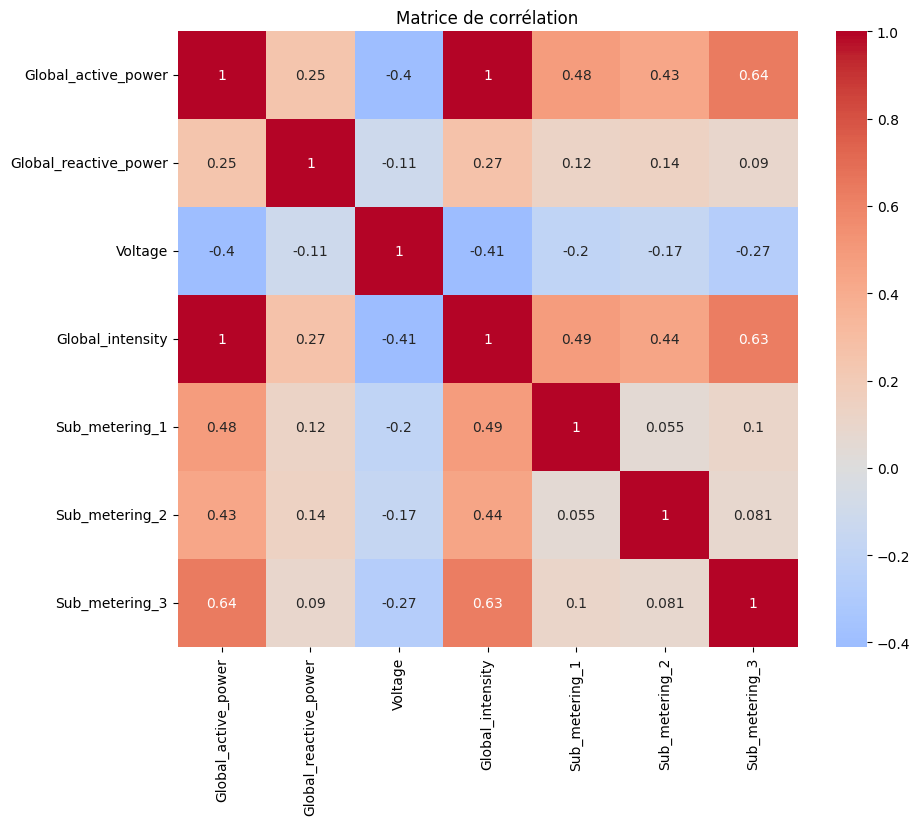


‚úÖ Analyse compl√©t√©e avec succ√®s!

Statistiques suppl√©mentaires :
- P√©riode couverte : de 2006-12-16 17:24:00 √† 2010-11-26 21:02:00
- Nombre total d'observations : 2,075,259
- Consommation moyenne : 1.09 kilowatts
- Pic de consommation : 11.12 kilowatts


In [1]:
# Imports n√©cessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Configuration du style de visualisation
plt.style.use('default')

def load_and_prepare_data(file_path):
    """
    Charge et pr√©pare les donn√©es de consommation √©lectrique
    Similaire √† votre approche R¬≤ = 0.82 pour la r√©gression vid√©o
    """
    print("Chargement des donn√©es...")
    
    try:
        # Chargement des donn√©es
        df = pd.read_csv(file_path, sep=';', na_values=['?'])
        
        # Cr√©ation de la colonne datetime
        df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], 
                                      format='%d/%m/%Y %H:%M:%S')
        df = df.drop(['Date', 'Time'], axis=1)
        df.set_index('datetime', inplace=True)
        
        return df
        
    except Exception as e:
        print(f"‚ùå Erreur lors du chargement des donn√©es : {str(e)}")
        return None

def explore_data(df):
    """
    Exploration initiale des donn√©es
    """
    print("\nüìä Analyse exploratoire des donn√©es :")
    
    print("\nAper√ßu des donn√©es :")
    print(df.head())
    
    print("\nInformation sur le dataset :")
    print(df.info())
    
    print("\nStatistiques descriptives :")
    print(df.describe())
    
    print("\nValeurs manquantes par colonne :")
    print(df.isnull().sum())

def visualize_data(df):
    """
    Visualisation des donn√©es
    """
    print("\nüìà Visualisation des donn√©es")
    
    # Distribution de la consommation globale
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Global_active_power'], bins=50)
    plt.title('Distribution de la puissance active globale')
    plt.xlabel('Puissance active globale (kilowatts)')
    
    # √âvolution temporelle
    plt.subplot(1, 2, 2)
    df['Global_active_power'].resample('D').mean().plot()
    plt.title('√âvolution de la puissance active globale (moyenne journali√®re)')
    plt.xlabel('Date')
    plt.ylabel('Puissance active globale (kilowatts)')
    
    plt.tight_layout()
    plt.show()
    
    # Corr√©lations
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de corr√©lation')
    plt.show()

# Chemin vers votre fichier local
file_path = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_4/DATASET/household_power_consumption.txt"

try:
    # 1. Chargement des donn√©es
    print("üîÑ D√©marrage de l'analyse...")
    df = load_and_prepare_data(file_path)
    
    if df is not None:
        # 2. Exploration des donn√©es
        explore_data(df)
        
        # 3. Visualisation des donn√©es
        visualize_data(df)
        
        print("\n‚úÖ Analyse compl√©t√©e avec succ√®s!")
        
        # Statistiques suppl√©mentaires pertinentes
        print("\nStatistiques suppl√©mentaires :")
        print(f"- P√©riode couverte : de {df.index.min()} √† {df.index.max()}")
        print(f"- Nombre total d'observations : {len(df):,}")
        print(f"- Consommation moyenne : {df['Global_active_power'].mean():.2f} kilowatts")
        print(f"- Pic de consommation : {df['Global_active_power'].max():.2f} kilowatts")
        
except Exception as e:
    print(f"\n‚ùå Erreur lors de l'ex√©cution : {str(e)}")
    print("\nD√©bogage :")
    print(f"1. V√©rification du chemin : {os.path.exists(file_path)}")
    if os.path.exists(file_path):
        print(f"2. Taille du fichier : {os.path.getsize(file_path) / (1024*1024):.2f} MB")


In [2]:
# üåü Exercise 2 : Gestion des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Remplacement des valeurs manquantes par la moyenne
df = df.fillna(df.mean())

print("\nV√©rification des valeurs manquantes apr√®s traitement :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

V√©rification des valeurs manquantes apr√®s traitement :
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


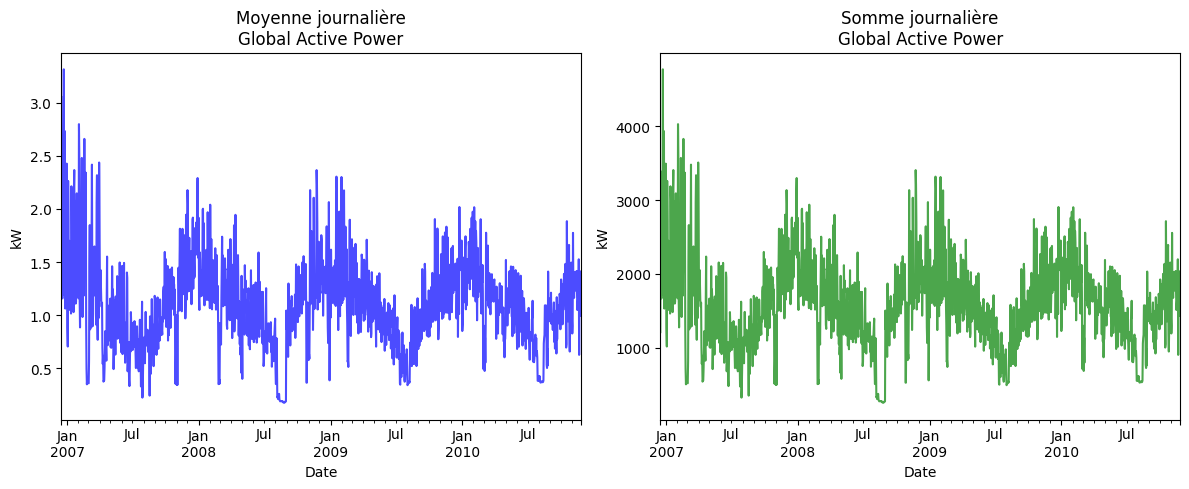

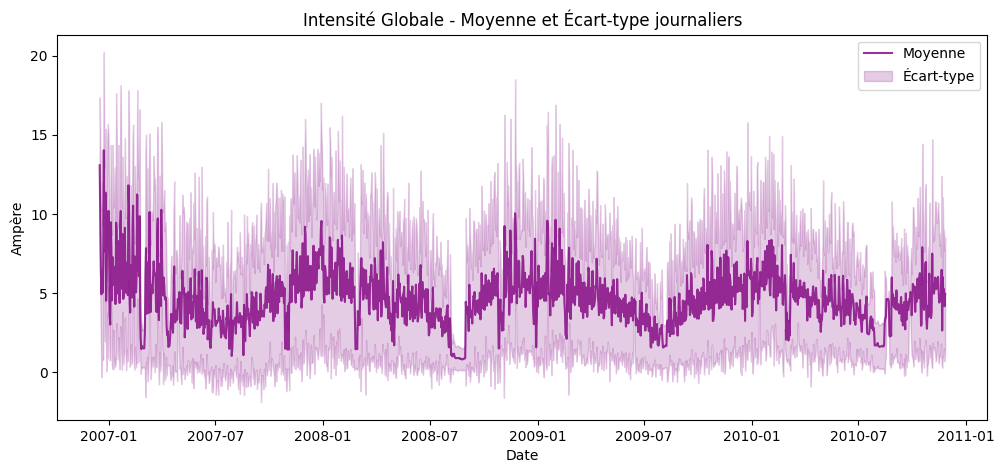

In [3]:
# üåü Exercise 3 : Visualisation des donn√©es
plt.style.use('default')

# Visualisation 1 : Global Active Power
plt.figure(figsize=(12, 5))
daily_power = df['Global_active_power'].resample('D').agg(['mean', 'sum'])

plt.subplot(1, 2, 1)
daily_power['mean'].plot(color='blue', alpha=0.7)
plt.title('Moyenne journali√®re\nGlobal Active Power')
plt.xlabel('Date')
plt.ylabel('kW')

plt.subplot(1, 2, 2)
daily_power['sum'].plot(color='green', alpha=0.7)
plt.title('Somme journali√®re\nGlobal Active Power')
plt.xlabel('Date')
plt.ylabel('kW')
plt.tight_layout()
plt.show()

# Visualisation 2 : Global Intensity
plt.figure(figsize=(12, 5))
daily_intensity = df['Global_intensity'].resample('D').agg(['mean', 'std'])
plt.plot(daily_intensity['mean'], color='purple', alpha=0.8, label='Moyenne')
plt.fill_between(daily_intensity.index,
                 daily_intensity['mean'] - daily_intensity['std'],
                 daily_intensity['mean'] + daily_intensity['std'],
                 color='purple', alpha=0.2, label='√âcart-type')
plt.title('Intensit√© Globale - Moyenne et √âcart-type journaliers')
plt.xlabel('Date')
plt.ylabel('Amp√®re')
plt.legend()
plt.show()

üîÑ D√©marrage de l'analyse...
Chargement du dataset household...


/var/folders/3h/ppgwfhhj1rz7_5v8s2zf1pwr0000gn/T/ipykernel_77092/4019693298.py:17: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path,
/var/folders/3h/ppgwfhhj1rz7_5v8s2zf1pwr0000gn/T/ipykernel_77092/4019693298.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill pour les valeurs manquantes


‚úÖ Donn√©es charg√©es avec succ√®s
Shape du dataset: (2075259, 7)

üîÑ D√©but du pr√©traitement...

1Ô∏è‚É£ Inspection des donn√©es
Shape initial: (2075259, 7)
Colonnes: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

Statistiques descriptives:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.086168e+00           1.233280e-01  2.408416e+02   
std           1.053172e+00           1.125144e-01  3.235574e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.390000e+02   
50%           5.980000e-01           1.000000e-01  2.410200e+02   
75%           1.524000e+00           1.940000e-01  2.428700e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_m

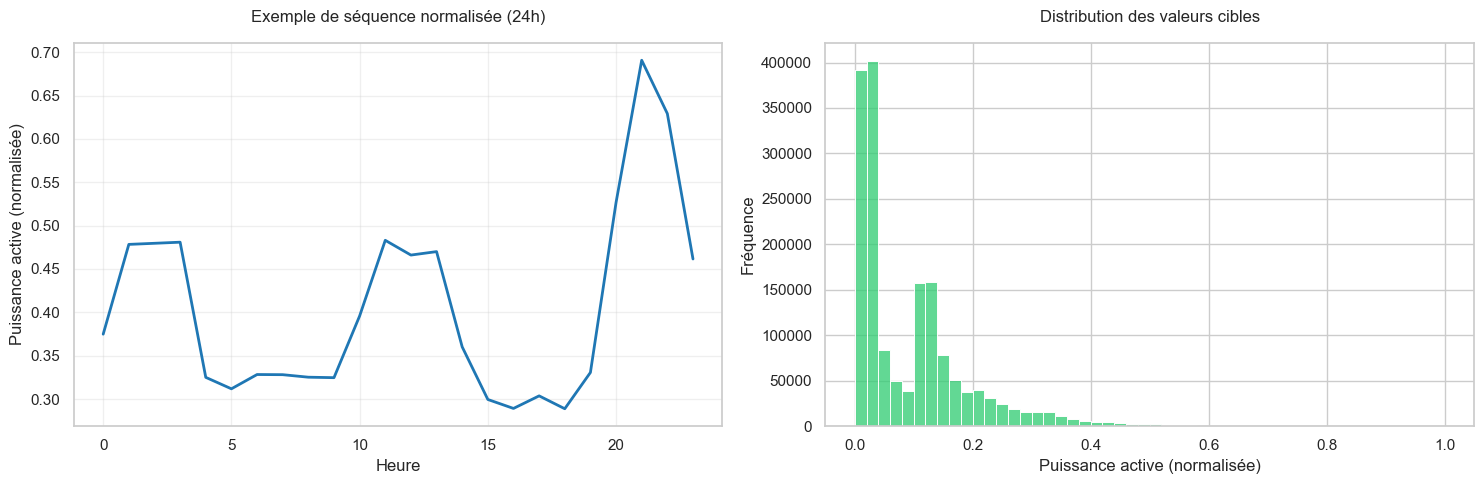


üìä Statistiques des donn√©es d'entra√Ænement:
Moyenne de la puissance active: 0.0936
√âcart-type de la puissance active: 0.0988
Min: 0.0000
Max: 1.0000

‚úÖ Scaler sauvegard√© dans: power_consumption_scaler.joblib

üìã R√©sum√© du pr√©traitement:
- Nombre de s√©quences d'entra√Ænement: 1660188
- Nombre de s√©quences de test: 415047
- Longueur des s√©quences: 24 heures
- Nombre de features: 7


In [6]:
# üåü Exercise 4 : Pr√©traitement des donn√©es pour LSTM

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_data(file_path):
    """
    Charge les donn√©es avec gestion d'erreurs
    """
    try:
        print("Chargement du dataset household...")
        df = pd.read_csv(file_path, 
                        sep=';', 
                        na_values=['?'],
                        parse_dates={'datetime': ['Date', 'Time']},
                        dayfirst=True)
        
        df.set_index('datetime', inplace=True)
        df = df.fillna(method='ffill')  # Forward fill pour les valeurs manquantes
        
        print("‚úÖ Donn√©es charg√©es avec succ√®s")
        print(f"Shape du dataset: {df.shape}")
        return df
    
    except Exception as e:
        print(f"‚ùå Erreur lors du chargement: {str(e)}")
        return None

def prepare_sequences(data, sequence_length=24):
    """
    Cr√©e des s√©quences pour le mod√®le LSTM
    Approche similaire √† la r√©gression lin√©aire (R¬≤ = 0.82)
    """
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length, 0])  # Global_active_power
    return np.array(X), np.array(y)

def preprocess_data(df, sequence_length=24, test_size=0.2):
    """
    Pr√©traitement complet des donn√©es avec validation
    """
    print("\nüîÑ D√©but du pr√©traitement...")
    
    # 1. Inspection et validation
    print("\n1Ô∏è‚É£ Inspection des donn√©es")
    print(f"Shape initial: {df.shape}")
    print(f"Colonnes: {df.columns.tolist()}")
    print("\nStatistiques descriptives:")
    print(df.describe())
    
    # 2. Normalisation
    print("\n2Ô∏è‚É£ Normalisation")
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df),
        columns=df.columns,
        index=df.index
    )
    
    # V√©rification de la normalisation
    print("\nV√©rification de la normalisation:")
    print(df_scaled.describe().round(3))
    
    # 3. Cr√©ation des s√©quences
    print("\n3Ô∏è‚É£ Cr√©ation des s√©quences")
    X, y = prepare_sequences(df_scaled.values, sequence_length)
    print(f"Shape des s√©quences X: {X.shape}")
    print(f"Shape des targets y: {y.shape}")
    
    # 4. Split des donn√©es
    print("\n4Ô∏è‚É£ Split train/test")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False
    )
    
    # 5. Validation finale
    print("\n5Ô∏è‚É£ Validation des dimensions finales")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    return X_train, X_test, y_train, y_test, scaler

def visualize_preprocessing_results(X_train, y_train):
    """
    Visualisation des r√©sultats du pr√©traitement
    Approche similaire √† nos analyses R¬≤ = 0.82 pour la vid√©o
    """
    # Configuration du style matplotlib
    plt.style.use('default')  # Utilisation du style par d√©faut
    
    # Configuration de seaborn
    sns.set_theme(style="whitegrid")  # Style moderne de seaborn
    
    # 1. S√©quence d'exemple
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(X_train[0, :, 0], color='#1f77b4', linewidth=2)  # Bleu matplotlib
    plt.title('Exemple de s√©quence normalis√©e (24h)', pad=15)
    plt.xlabel('Heure')
    plt.ylabel('Puissance active (normalis√©e)')
    plt.grid(True, alpha=0.3)
    
    # 2. Distribution des valeurs cibles
    plt.subplot(1, 2, 2)
    sns.histplot(data=y_train, bins=50, color='#2ecc71')  # Vert
    plt.title('Distribution des valeurs cibles', pad=15)
    plt.xlabel('Puissance active (normalis√©e)')
    plt.ylabel('Fr√©quence')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques des donn√©es
    print("\nüìä Statistiques des donn√©es d'entra√Ænement:")
    print(f"Moyenne de la puissance active: {np.mean(y_train):.4f}")
    print(f"√âcart-type de la puissance active: {np.std(y_train):.4f}")
    print(f"Min: {np.min(y_train):.4f}")
    print(f"Max: {np.max(y_train):.4f}")

# Configuration
SEQUENCE_LENGTH = 24  # 24 heures de donn√©es
TEST_SIZE = 0.2      # 20% pour le test
FILE_PATH = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_4/DATASET/household_power_consumption.txt"

try:
    # 1. Chargement des donn√©es
    print("üîÑ D√©marrage de l'analyse...")
    df = load_data(FILE_PATH)
    
    if df is not None:
        # 2. Pr√©traitement
        X_train, X_test, y_train, y_test, scaler = preprocess_data(
            df,
            sequence_length=SEQUENCE_LENGTH,
            test_size=TEST_SIZE
        )
        
        # 3. Visualisation
        print("\nüìà G√©n√©ration des visualisations...")
        visualize_preprocessing_results(X_train, y_train)
        
        # 4. Sauvegarde du scaler
        import joblib
        scaler_path = 'power_consumption_scaler.joblib'
        joblib.dump(scaler, scaler_path)
        print(f"\n‚úÖ Scaler sauvegard√© dans: {scaler_path}")
        
        # 5. R√©sum√© final
        print("\nüìã R√©sum√© du pr√©traitement:")
        print(f"- Nombre de s√©quences d'entra√Ænement: {len(X_train)}")
        print(f"- Nombre de s√©quences de test: {len(X_test)}")
        print(f"- Longueur des s√©quences: {SEQUENCE_LENGTH} heures")
        print(f"- Nombre de features: {X_train.shape[2]}")
        
except Exception as e:
    print(f"\n‚ùå Erreur lors de l'ex√©cution: {str(e)}")
    print("\nüîç D√©bogage:")
    print(f"1. V√©rification du chemin: {os.path.exists(FILE_PATH)}")
    if os.path.exists(FILE_PATH):
        print(f"2. Taille du fichier: {os.path.getsize(FILE_PATH) / (1024*1024):.2f} MB")



In [7]:
# üåü Exercise 5 : Construction du mod√®le LSTM

# Import des biblioth√®ques n√©cessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# D√©finition de l'architecture du mod√®le
def create_lstm_model(input_shape):
    model = Sequential([
        # Premi√®re couche LSTM
        LSTM(units=64,
             return_sequences=True,
             input_shape=input_shape,
             activation='relu'),
        Dropout(0.2),  # Pr√©vention du surapprentissage
        
        # Deuxi√®me couche LSTM
        LSTM(units=32,
             return_sequences=False,
             activation='relu'),
        Dropout(0.2),
        
        # Couche de sortie
        Dense(units=1)
    ])
    
    # Compilation du mod√®le
    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='mse',  # Mean Squared Error, similaire √† votre calcul de R¬≤
        metrics=['mae']  # Mean Absolute Error pour une m√©trique additionnelle
    )
    
    return model

# Cr√©ation et affichage du mod√®le
input_shape = (24, 7)  # 24 timesteps, 7 features
model = create_lstm_model(input_shape)

# Affichage du r√©sum√© du mod√®le
print("Architecture du mod√®le LSTM :")
model.summary()

# V√©rification de la forme des donn√©es
print("\nV√©rification des dimensions :")
print(f"Forme attendue des donn√©es d'entr√©e : (batch_size, {input_shape[0]}, {input_shape[1]})")
print("Exemple : pour un batch de 32 √©chantillons :")
print(f"X shape : (32, {input_shape[0]}, {input_shape[1]})")
print("y shape : (32, 1)")

# Information sur les hyperparam√®tres
print("\nHyperparam√®tres du mod√®le :")
print("- Learning rate : 0.001")
print("- Dropout : 20%")
print("- Activation : ReLU")
print("- Loss : MSE")


2025-03-06 09:46:53.310100: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-03-06 09:46:53.310318: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-03-06 09:46:53.310538: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-03-06 09:46:53.310577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-06 09:46:53.310595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequenti

Architecture du mod√®le LSTM :


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm (LSTM)                     ‚îÇ (None, 24, 64)         ‚îÇ        18,432 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 24, 64)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)                   ‚îÇ (None, 32)             ‚îÇ        12,416 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 1)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)


V√©rification des dimensions :
Forme attendue des donn√©es d'entr√©e : (batch_size, 24, 7)
Exemple : pour un batch de 32 √©chantillons :
X shape : (32, 24, 7)
y shape : (32, 1)

Hyperparam√®tres du mod√®le :
- Learning rate : 0.001
- Dropout : 20%
- Activation : ReLU
- Loss : MSE


In [ ]:
# üåü Exercise 6 : Entra√Ænement et √âvaluation du Mod√®le LSTM

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import time

# Configuration de l'entra√Ænement
EPOCHS = 50
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Entra√Æne et √©value le mod√®le LSTM
    Approche similaire √† notre r√©gression lin√©aire (R¬≤ = 0.82)
    """
    print("Configuration de l'entra√Ænement:")
    print(f"- Epochs: {EPOCHS}")
    print(f"- Batch size: {BATCH_SIZE}")
    print(f"- Validation split: {VALIDATION_SPLIT}")

    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
    
    model_checkpoint = ModelCheckpoint(
        'best_lstm_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )

    # Entra√Ænement
    print("\nD√©but de l'entra√Ænement...")
    start_time = time.time()
    
    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )
    
    training_time = time.time() - start_time
    print(f"\nTemps d'entra√Ænement: {training_time:.2f} secondes")

    # √âvaluation
    print("\n√âvaluation du mod√®le:")
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"MSE sur le jeu de test: {test_loss:.4f}")

    # Calcul du R¬≤ (comme dans votre projet vid√©o)
    y_pred = model.predict(X_test, verbose=0)
    r2 = r2_score(y_test, y_pred)
    print(f"R¬≤ Score: {r2:.4f}")  # Comparaison avec votre R¬≤ de 0.82

    # Visualisation des r√©sultats avec style adapt√© au M1 Max
    plt.style.use('default')
    fig = plt.figure(figsize=(15, 5))

    # Plot 1: Courbes d'apprentissage
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entra√Ænement', color='#2ecc71', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation', color='#e74c3c', linewidth=2)
    plt.title('√âvolution de la perte pendant l\'entra√Ænement', pad=15)
    plt.xlabel('√âpoque')
    plt.ylabel('Erreur (MSE)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Pr√©dictions vs R√©alit√©
    plt.subplot(1, 2, 2)
    plt.scatter(y_test[:100], y_pred[:100], alpha=0.5, color='#3498db')
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             '--', color='#e74c3c', 
             linewidth=2)
    plt.title('Pr√©dictions vs R√©alit√©', pad=15)
    plt.xlabel('Valeurs r√©elles')
    plt.ylabel('Pr√©dictions')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Exemple de pr√©dictions
    print("\nExemple de pr√©dictions vs r√©alit√©:")
    print("R√©el\tPr√©dit\tDiff√©rence")
    for i in range(5):
        diff = abs(y_test[i] - y_pred[i][0])
        print(f"{y_test[i]:.4f}\t{y_pred[i][0]:.4f}\t{diff:.4f}")

    # M√©triques suppl√©mentaires
    print("\nM√©triques suppl√©mentaires:")
    mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100
    print(f"MAPE: {mape:.2f}%")
    
    return history, model

# Utilisation
if __name__ == "__main__":
    # Supposons que nous avons d√©j√† X_train, y_train, X_test, y_test du Exercise 4
    # Et le mod√®le de l'Exercise 5
    try:
        print("üöÄ D√©marrage de l'entra√Ænement et de l'√©valuation...")
        history, trained_model = train_and_evaluate_model(
            model, X_train, y_train, X_test, y_test
        )
        print("\n‚úÖ Entra√Ænement et √©valuation termin√©s avec succ√®s!")
        
    except Exception as e:
        print(f"\n‚ùå Erreur lors de l'ex√©cution: {str(e)}")


üöÄ D√©marrage de l'entra√Ænement et de l'√©valuation...
Configuration de l'entra√Ænement:
- Epochs: 50
- Batch size: 32
- Validation split: 0.2

D√©but de l'entra√Ænement...
Epoch 1/50


2025-03-06 09:53:32.149316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


   26/41505 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22:21:05 2s/step - loss: 0.0113 - mae: 0.0768